# To be completed at the Live Session and in your own time.

These set of examples we will help you get familiar with estimating probabilities and using Bayes Theorem within a Jupyter notebook. 

Before attempting these examples, please ensure you have read through [Chapter 4 Jupyter Notebook](https://github.com/haleygomez/Data-Analysis-2022/blob/master/blended_exercises/Chapter4/Chapter4.ipynb) and have completed the Learning Central **Chapter 4 quiz**. 

These are good practice for CA 1 Question 5.

***

# Errors

## Question 

Three students measure the same resistance several times, with final measurements (in Ohms):

Student 1: $R = 11 \pm 1$
Student 2: $R = 12 \pm 1$
Student 3: $R = 10 \pm 3$.

Given these three results what do we write down as the best estimate for the resistance $R$? Tip: you will need to use weighted errors.

### Answer

The weights are given by $w = 1/\sigma_i^2$.  The weighted average is 

$R= \dfrac{\sum{w_i R}}{\sum{w_i}}$


In python:

In [2]:
import numpy as np

R = np.array([11.,12.,10.])
std = np.array([1.,1.,3.])


weights = 1./(std**2.)

best_r = np.sum(weights*R)/np.sum(weights) 
uncert_r = np.sqrt(1./np.sum(weights))

print('The resistance is {:.1f} +/- {:.1f} Ohms'.format(best_r,uncert_r))

The resistance is 11.4 +/- 0.7 Ohms


***

# Correlation

## Question 

 The datafile [worldpopulation.txt](https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter4/worldpopulation.txt) contains the world population size measured since 1960. Plot the data (you will need to upload the datafile to your Google Colab). <br><br>

Measure the correlation coefficient using the in built Python package for the Pearson $r$s statistic. <br><br>

Measure it again but this time creating the functions to calculate $r$ from scratch.  

The url of the file is "https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter4/worldpopulation.txt"

### Answer

Remember for students using google colab, instead try 

> `!wget -O worldpopulation.txt "https://github.com/haleygomez/Data-Analysis-2021/raw/master/blended_exercises/Chapter4/worldpopulation.txt"`

Text(0.5, 0, 'year')

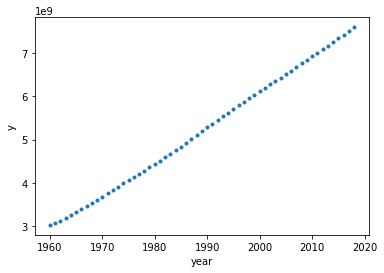

In [3]:
import numpy as np
import pylab as plt

# the line below makes the plot appear in the jupyter notebook
%matplotlib inline  

data = np.genfromtxt('files_needed/worldpopulation.txt')

plt.plot(data[0],data[1],'.')
plt.ylabel('y')
plt.xlabel('year')

Calculate $r$ using in built python function.

In [4]:
from scipy.stats import pearsonr

corr, _ = pearsonr(data[0], data[1])
print('Pearsons correlation for the world population growth is: %.5f' % corr)

Pearsons correlation for the world population growth is: 0.99956


Now calculate $r$ by hand using the information in Chapter 4 notebook.

In [5]:
# need to know how many data points
n = len(data[0])

# get some means + stdevs calculated
mean_n = np.mean(data[1])
std_n =  np.sqrt( np.sum((data[1]-mean_n)**2.0)/(n-1))

mean_yr = np.mean(data[0])
std_yr = np.sqrt( np.sum((data[0]-mean_yr)**2.0)/(n-1))

print('average number is {:.2e} +/- {:.2e}'.format(mean_n,std_n))
print('average year is {:.0f} +/- {:.0f}'.format(mean_yr,std_yr))


# correlation coefficient 
sum_xdiff_ydiff = np.sum((data[0]-mean_yr)*(data[1]-mean_n)) 

# denominator of correlation coefficient 
sum_x_diff_mean_sq = np.sum([(data[0]-mean_yr)**2])
sum_y_diff_mean_sq = np.sum([(data[1]-mean_n)**2])
                            
r = sum_xdiff_ydiff/ np.sqrt(sum_x_diff_mean_sq* sum_y_diff_mean_sq) 

print()
print('correlation coefficient between the two is {:.5f}'.format(r))

average number is 5.22e+09 +/- 1.38e+09
average year is 1989 +/- 17

correlation coefficient between the two is 0.99956


Correlation Coefficient is almost 1, indicating a very strong positive correlation in this data.

***

# Hypothesis Testing

## Question

A company releases a new ski wax that it claims (naturally) is superior to its rivals, and greatly reduces the friction between skis and snow. A skiing magazine decides to test the claim by performing an experiment. They take 10 pairs of skis, and treat one ski from each pair -- the left one -- with the new wax, and the other (the right) ski with the wax from a competing brand. Each pair of skis are then released from the top of a ramp in turn, and they record which of the two skis reach the bottom of the ramp first.    The team find that the new skis win 8 of the 10 races.  Is their claim correct?

### Answer

Let's set our null hypothesis: that the new wax makes no difference eg each ski should have the same probability of crossing the line first 

$p(\text{new wax win}) = p(\text{new wax lose}) = 0.5$

The probability of winning all 10 races with the treated skis is 

$p(\nu {\rm ~wins~ in ~10~ races}) =  B_{10, 0.5}(\nu) = \dfrac{10!}{\nu!(10-\nu)!} \left( \dfrac{1}{2} \right)^{10} < 0.1\%$

So if our null hypothesis is correct, then the probability of winning all 10 races would be really unlikely. 

So what is the probability of winning 8 races given our null hypothesis? We need to account for the fact that

$P({\rm 8 ~or~ more ~wins ~in~ 10 ~races}) = p({\rm 8~ wins}) + p({\rm 9~ wins}) + p({\rm 10~ wins})$

Note that we do this instead of just calculating $B_{10, 0.5}(8)$ for the following reason:  consider the case where we had 100 races. The chances of getting exactly 80 wins is now quite a bit less than the chance of winning 8 out of 10 races even though the fractional difference is the same!

In [6]:
from scipy.stats import binom

# example for winning all 10 races
nu = 10
p=0.5
N=10
prob_all_10  = binom.pmf(nu,N, p)

# example for winning 8 out of 10
nu = 8
p=0.5
N=10
prob_8  = binom.pmf(nu,N, p)

# but we need to add the probability they get 8 or more wins in 10 races
item = [8,9,10]
prob_sum = 0.

for i in range(len(item)):
    prob_sum = binom.pmf(item[i],N, p)+prob_sum

print('probability the treated skis win at least 8 \
races out of 10 is {:.2f}'.format(prob_sum))

probability the treated skis win at least 8 races out of 10 is 0.05


So do we reject our null hypothesis? There are 2 alternatives:

- Our null hypothesis is correct, but by chance an unlikely event has occurred (the new wax makes no difference, but by a fluke, those skis with this wax won anyway)
- our null hypothesis is false (the new wax really is helping the skis to go faster)

We saw above that the probability of seeing at least 8 wins in 10 races was 5.5%, which is above our 5% boundary: we cannot reject the null hypothesis with this experiment. Our results were not significant. 

But if we had measured 10 wins in 10 races, since the probability was so low, then we could have said that there was significant evidence that the wax helps. 

***